<a href="https://colab.research.google.com/github/rujool11/ML-learning/blob/main/03_2_CNN_CompVision_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiclass Classification using CNN**

### **Getting and setting up data**

In [ ]:
import zipfile

# get data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-10-09 12:06:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.207, 142.250.103.207, 142.250.159.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  38.1MB/s    in 6.5s    

2023-10-09 12:06:20 (76.1 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/test
there are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data/test/steak
there are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are 10 directories and 0 images in 10_fo

In [ ]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  img_path = target_folder + '/' + random_img[0]
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis(False)
  plt.title(target_class)
  print(f'image shape: {img.shape}')

  return img

['3140245.jpg']
image shape: (512, 512, 3)


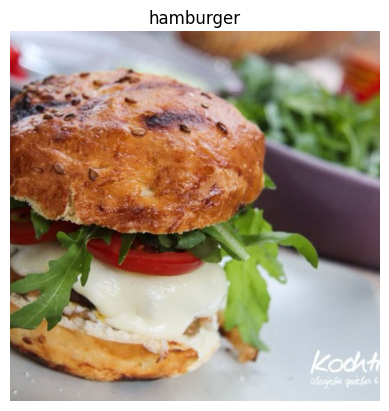

In [ ]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### **Preprocessing data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
def plot_loss_curves(history):

  loss = history.history['loss']
  accuracy = history.history['accuracy']

  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs=range(len(loss))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='valdation_loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='valdation_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend();


### **Creating model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25* len(test_data)))

Epoch 1/5
235/235 [==============================] - 36s 106ms/step - loss: 2.1884 - accuracy: 0.1787 - val_loss: 2.0905 - val_accuracy: 0.2319
Epoch 2/5
235/235 [==============================] - 25s 106ms/step - loss: 1.9546 - accuracy: 0.3039 - val_loss: 1.9216 - val_accuracy: 0.3289
Epoch 3/5
235/235 [==============================] - 25s 104ms/step - loss: 1.6752 - accuracy: 0.4308 - val_loss: 1.7987 - val_accuracy: 0.3799
Epoch 4/5
235/235 [==============================] - 24s 102ms/step - loss: 1.2921 - accuracy: 0.5631 - val_loss: 2.0676 - val_accuracy: 0.3191
Epoch 5/5
235/235 [==============================] - 24s 104ms/step - loss: 0.7909 - accuracy: 0.7377 - val_loss: 2.5695 - val_accuracy: 0.3158


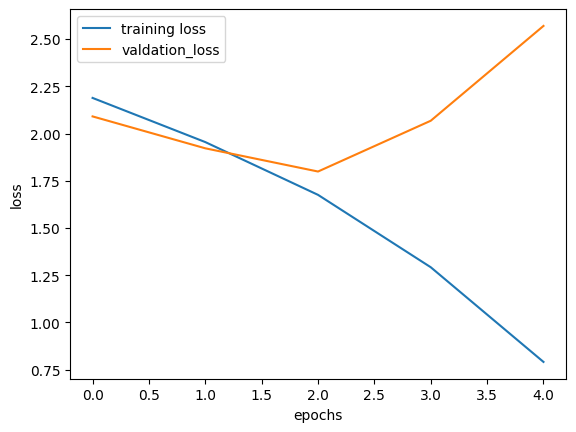

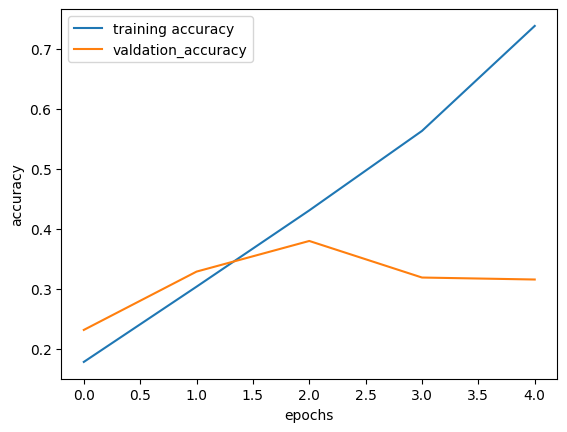

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# as we can see, the model is overfitting

### **Reducing overfitting**

In [ ]:
# trying to simplify the model

model_2 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25* len(test_data)))

Epoch 1/5
235/235 [==============================] - 29s 108ms/step - loss: 2.2877 - accuracy: 0.1873 - val_loss: 2.0388 - val_accuracy: 0.2747
Epoch 2/5
235/235 [==============================] - 24s 100ms/step - loss: 1.8058 - accuracy: 0.3791 - val_loss: 1.9332 - val_accuracy: 0.3141
Epoch 3/5
235/235 [==============================] - 25s 106ms/step - loss: 1.1872 - accuracy: 0.6144 - val_loss: 2.1861 - val_accuracy: 0.2944
Epoch 4/5
235/235 [==============================] - 24s 102ms/step - loss: 0.5031 - accuracy: 0.8576 - val_loss: 2.8328 - val_accuracy: 0.2780
Epoch 5/5
235/235 [==============================] - 25s 107ms/step - loss: 0.1657 - accuracy: 0.9643 - val_loss: 3.6891 - val_accuracy: 0.2845


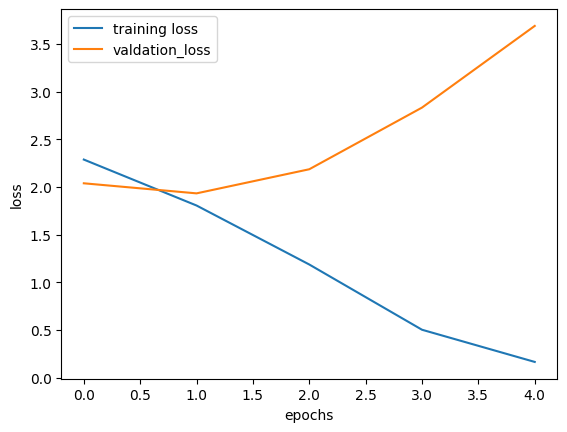

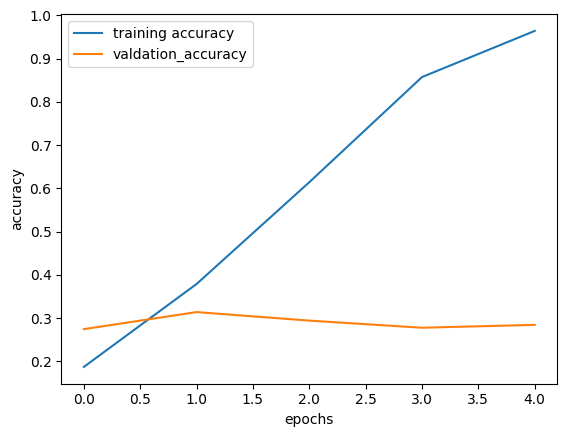

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# keep conv and pool layers same, but decrease Dense layers

model_3 = Sequential([
    Conv2D(10, 3, activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25* len(test_data)))

Epoch 1/5
235/235 [==============================] - 32s 122ms/step - loss: 2.1442 - accuracy: 0.2027 - val_loss: 2.0750 - val_accuracy: 0.2303
Epoch 2/5
235/235 [==============================] - 24s 103ms/step - loss: 1.9160 - accuracy: 0.3260 - val_loss: 1.8436 - val_accuracy: 0.3289
Epoch 3/5
235/235 [==============================] - 25s 107ms/step - loss: 1.6176 - accuracy: 0.4444 - val_loss: 2.0048 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 26s 111ms/step - loss: 1.1236 - accuracy: 0.6231 - val_loss: 2.0496 - val_accuracy: 0.3487
Epoch 5/5
235/235 [==============================] - 26s 111ms/step - loss: 0.5681 - accuracy: 0.8191 - val_loss: 2.7796 - val_accuracy: 0.3306


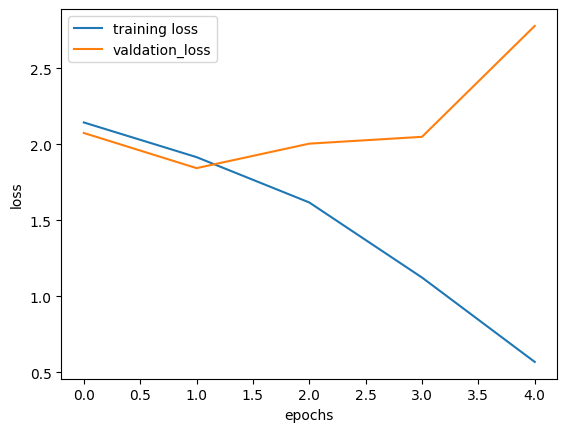

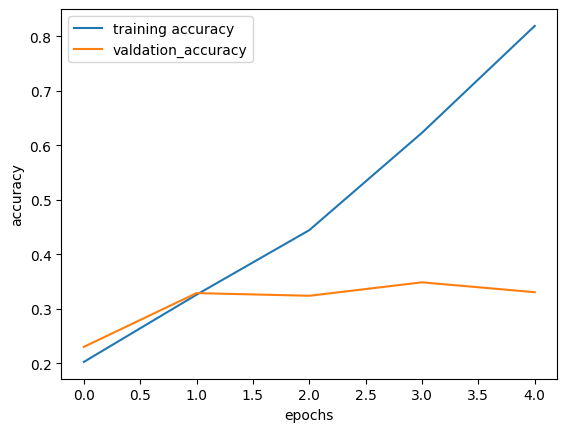

In [ ]:
plot_loss_curves(history_3)

In [ ]:
# try data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   shuffle=True,
                                                                   batch_size=32,
                                                                   class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [ ]:
model_4 = tf.keras.models.clone_model(model_3) # clones model with resetting params

model_4.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=0.25*int(len(test_data)))

Epoch 1/5
235/235 [==============================] - 109s 452ms/step - loss: 2.2658 - accuracy: 0.1404 - val_loss: 2.2058 - val_accuracy: 0.2078
Epoch 2/5
235/235 [==============================] - 107s 455ms/step - loss: 2.1685 - accuracy: 0.2136 - val_loss: 2.0508 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 103s 438ms/step - loss: 2.0905 - accuracy: 0.2508 - val_loss: 1.9774 - val_accuracy: 0.3047
Epoch 4/5
235/235 [==============================] - 104s 442ms/step - loss: 2.0032 - accuracy: 0.2919 - val_loss: 2.0031 - val_accuracy: 0.2891
Epoch 5/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9688 - accuracy: 0.3023 - val_loss: 1.8127 - val_accuracy: 0.3531


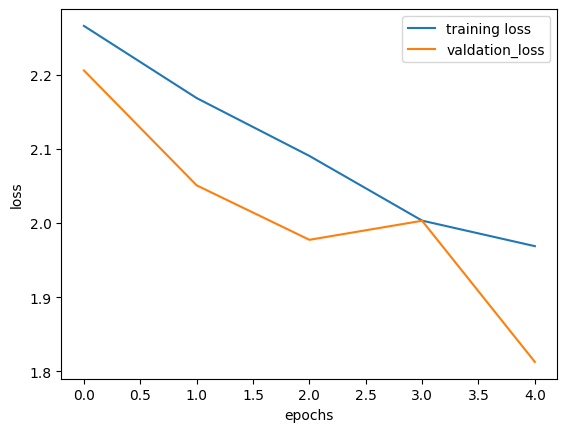

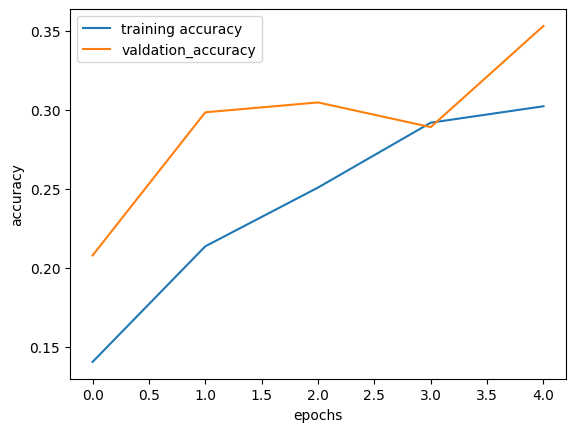

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# try running for more epochs

model_5 = tf.keras.models.clone_model(model_4)

model_5.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data_augmented,
                        epochs=25,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=0.25*int(len(test_data)))

Epoch 1/25
235/235 [==============================] - 109s 454ms/step - loss: 2.2256 - accuracy: 0.1693 - val_loss: 2.1241 - val_accuracy: 0.2266
Epoch 2/25
235/235 [==============================] - 107s 456ms/step - loss: 2.1333 - accuracy: 0.2212 - val_loss: 1.9652 - val_accuracy: 0.2719
Epoch 3/25
235/235 [==============================] - 105s 445ms/step - loss: 2.0758 - accuracy: 0.2424 - val_loss: 2.0014 - val_accuracy: 0.2969
Epoch 4/25
235/235 [==============================] - 104s 444ms/step - loss: 2.0260 - accuracy: 0.2811 - val_loss: 1.9578 - val_accuracy: 0.3125
Epoch 5/25
235/235 [==============================] - 103s 436ms/step - loss: 1.9837 - accuracy: 0.3027 - val_loss: 1.8844 - val_accuracy: 0.3250
Epoch 6/25
235/235 [==============================] - 104s 441ms/step - loss: 1.9550 - accuracy: 0.3176 - val_loss: 1.8053 - val_accuracy: 0.3812
Epoch 7/25
235/235 [==============================] - 104s 444ms/step - loss: 1.9031 - accuracy: 0.3255 - val_loss: 1.7849 -

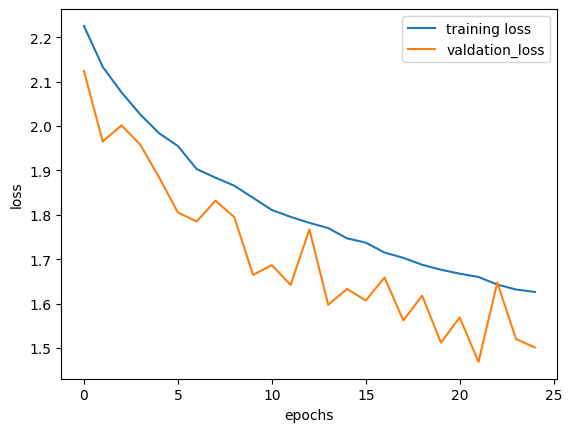

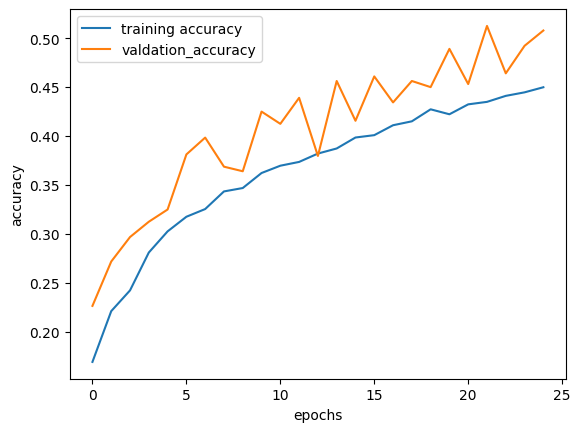

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# very noisy curves, but still overall decreasing loss and increasing accuracy (will work better if trained for more epochs)

model_5.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 1.5054 - accuracy: 0.4972


[1.505430817604065, 0.49720001220703125]

In [ ]:
def load_and_prep_img(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape,img_shape])
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_img(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]

  else: # for binary classification
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(pred_class)


  plt.axis(False)


1/1 [==============================] - 0s 18ms/step


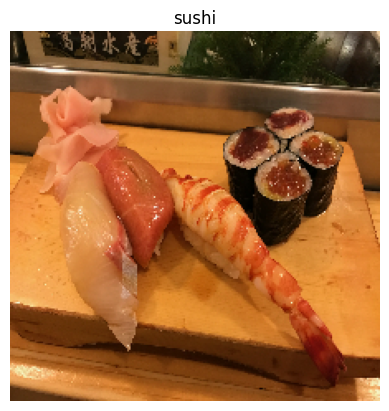

In [ ]:
pred_and_plot(model_5, '03-sushi.jpeg', class_names=class_names)

1/1 [==============================] - 0s 18ms/step


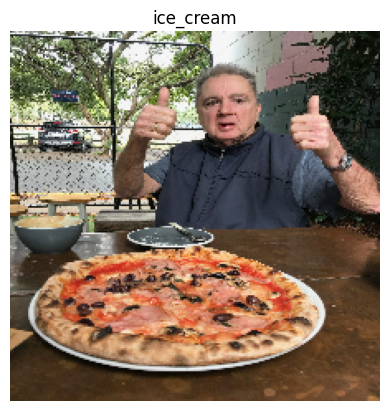

In [ ]:
pred_and_plot(model_5, '03-pizza-dad.jpeg')

1/1 [==============================] - 0s 23ms/step


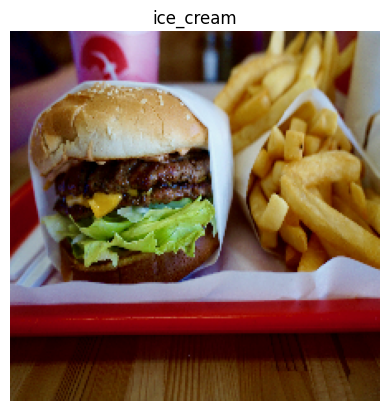

In [ ]:
pred_and_plot(model_5, '03-hamburger.jpeg')

1/1 [==============================] - 0s 36ms/step


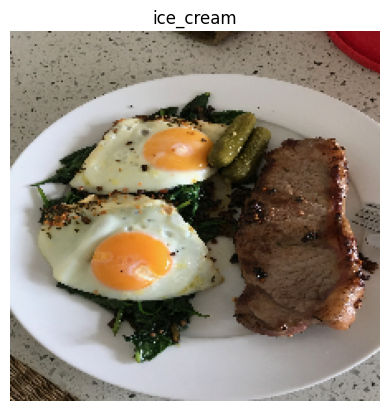

In [ ]:
pred_and_plot(model_5, '03-steak.jpeg')

### **Save and load**

In [ ]:
model_5.save('saved_model_5')

In [ ]:
loaded_model = tf.keras.models.load_model('saved_model_5')
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.5054 - accuracy: 0.4972


[1.5054306983947754, 0.49720001220703125]

In [ ]:
model_5.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 1.5054 - accuracy: 0.4972


[1.505430817604065, 0.49720001220703125]

In [ ]:
# as we can see this is exactly the same
loaded_model.evaluate(train_data)

235/235 [==============================] - 26s 112ms/step - loss: 1.5481 - accuracy: 0.4703


[1.5481046438217163, 0.4702666699886322]

In [ ]:
loaded_model.evaluate(train_data_augmented)

235/235 [==============================] - 109s 460ms/step - loss: 1.6360 - accuracy: 0.4340


[1.6360087394714355, 0.4339999854564667]